# Preparation pour le modèle de prédiction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [3]:
df = pd.read_csv('data/kc_house_data_clean.csv')

/tmp/ipykernel_14769/2329454336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=100, kde=False)


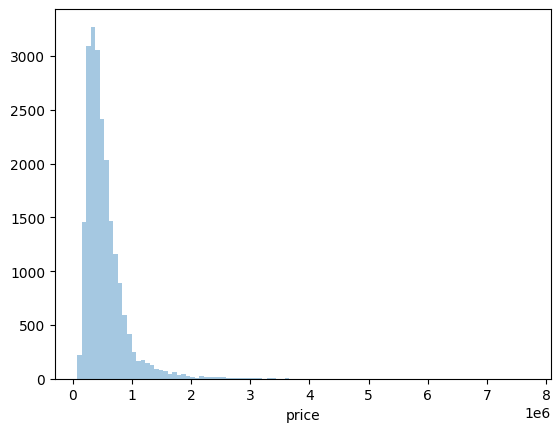

In [4]:
sns.distplot(df['price'], bins=100, kde=False)
plt.show()

# 1. On enlève les colonnes inutiles

           bedrooms  bathrooms
bedrooms   1.000000   0.514984
bathrooms  0.514984   1.000000


<AxesSubplot: xlabel='bedrooms', ylabel='bathrooms'>

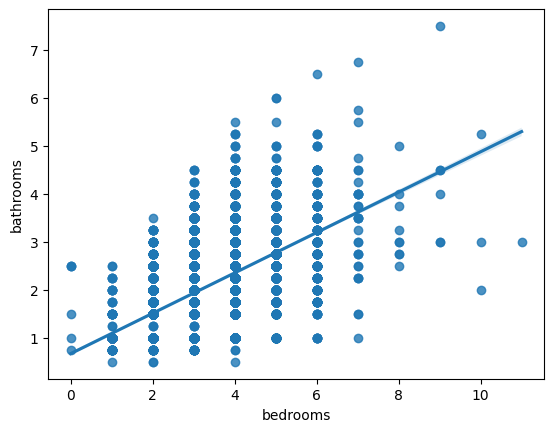

In [5]:
df_drop = df.drop(['date', 'id', 'lat' , 'long' , 'yr_built' , 'yr_renovated' , 'sqft_basement' , 'sqft_living15'  , 'sqft_lot15'  , 'sqft_above' , 'sqft_basement' , 'sqft_lot' ], axis=1)
# supprimer les valeurs aberrantes
df_drop = df_drop[df_drop['surface'] <= 8000]
df_drop = df_drop[df_drop['price'] <= 1500000]
# Ratio chambres/salle de bain


# correration entre la salle de bain et les chambres
print(df_drop[['bedrooms', 'bathrooms']].corr())
# graphique
sns.regplot(x='bedrooms', y='bathrooms', data=df_drop)

In [6]:
corr_matrix = df.corr()
pd.set_option('display.max_rows', 200)
print(corr_matrix['price'].sort_values(ascending=False))

price            1.000000
surface          0.701925
grade            0.667849
sqft_above       0.605395
sqft_living15    0.585235
bathrooms        0.525895
view             0.397350
sqft_basement    0.323859
bedrooms         0.316068
lat              0.306810
waterfront       0.266436
floors           0.256635
yr_renovated     0.126449
sqft_lot         0.089701
sqft_lot15       0.082494
yr_built         0.053861
condition        0.036176
long             0.022062
id              -0.016665
zipcode         -0.053437
Name: price, dtype: float64


/tmp/ipykernel_14769/1920133700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [7]:
df

,id,date,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21598,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21599,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21600,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df_drop

,price,bedrooms,bathrooms,surface,floors,waterfront,view,condition,grade,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,3,7,98178
1,538000.0,3,2.25,2570,2.0,0,0,3,7,98125
2,180000.0,2,1.00,770,1.0,0,0,3,6,98028
3,604000.0,4,3.00,1960,1.0,0,0,5,7,98136
4,510000.0,3,2.00,1680,1.0,0,0,3,8,98074
...,...,...,...,...,...,...,...,...,...,...
21597,360000.0,3,2.50,1530,3.0,0,0,3,8,98103
21598,400000.0,4,2.50,2310,2.0,0,0,3,8,98146
21599,402101.0,2,0.75,1020,2.0,0,0,3,7,98144
21600,400000.0,3,2.50,1600,2.0,0,0,3,8,98027


                price_per_sqft    price
price_per_sqft         1.00000  0.49738
price                  0.49738  1.00000


Text(0.5, 1.0, 'Prix au pieds carrés')

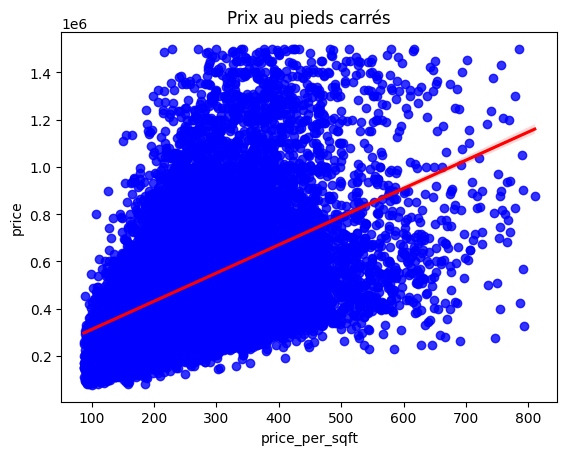

In [9]:
# KNN
df_knn = df.drop(['date', 'id', 'lat' , 'long' , 'yr_built' , 'yr_renovated' , 'sqft_basement' , 'sqft_living15'  , 'sqft_lot15'  , 'sqft_above' , 'sqft_basement' , 'sqft_lot'], axis=1)
df_knn = df_knn[df_knn['price'] <= 1500000] 
# prix aux pieds carrés
df_knn['price_per_sqft'] = df_knn['price'] / df_knn['surface']
# correlation entre le prix et les pieds carrés
print(df_knn[['price_per_sqft', 'price']].corr())
# graphique couleur ligne de regression en rouge et les poins en bleu
sns.regplot(x='price_per_sqft', y='price', data=df_knn, color='blue', line_kws={'color': 'red'})
plt.title('Prix au pieds carrés')

In [10]:
df_knn

,price,bedrooms,bathrooms,surface,floors,waterfront,view,condition,grade,zipcode,price_per_sqft
0,221900.0,3,1.00,1180,1.0,0,0,3,7,98178,188.050847
1,538000.0,3,2.25,2570,2.0,0,0,3,7,98125,209.338521
2,180000.0,2,1.00,770,1.0,0,0,3,6,98028,233.766234
3,604000.0,4,3.00,1960,1.0,0,0,5,7,98136,308.163265
4,510000.0,3,2.00,1680,1.0,0,0,3,8,98074,303.571429
...,...,...,...,...,...,...,...,...,...,...,...
21597,360000.0,3,2.50,1530,3.0,0,0,3,8,98103,235.294118
21598,400000.0,4,2.50,2310,2.0,0,0,3,8,98146,173.160173
21599,402101.0,2,0.75,1020,2.0,0,0,3,7,98144,394.216667
21600,400000.0,3,2.50,1600,2.0,0,0,3,8,98027,250.000000


In [11]:
df_drop.to_csv('data/kc_house_data_clean_model.csv', index=False)
df_knn.to_csv('data/kc_house_data_clean_knn.csv', index=False)